In [1]:
# 로지스틱 회귀 모델링

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
import warnings
warnings.filterwarnings('ignore')

# 1. 전처리된 데이터 로드
X_train = pd.read_csv('../processed_data/X_train.csv')
X_test = pd.read_csv('../processed_data/X_test.csv')
y_train = pd.read_csv('../processed_data/y_train.csv')
y_test = pd.read_csv('../processed_data/y_test.csv')

# Series로 변환 (y는 1차원이어야 함)
y_train = y_train.squeeze()
y_test = y_test.squeeze()

print(f"   X_train: {X_train.shape}")
print(f"   X_test: {X_test.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   y_test: {y_test.shape}")

print(f"\n   Train 불량 비율: {(y_train==1).sum() / len(y_train) * 100:.2f}%")
print(f"   Test 불량 비율: {(y_test==1).sum() / len(y_test) * 100:.2f}%")

   X_train: (1253, 478)
   X_test: (314, 478)
   y_train: (1253,)
   y_test: (314,)

   Train 불량 비율: 6.62%
   Test 불량 비율: 6.69%


In [2]:
# 2. 모델 학습

# 모델 생성
model = LogisticRegression(
    class_weight='balanced', # 불균형 데이터셋 처리
    max_iter=1000, # 수렴을 위한 충분한 반복
      random_state=42
      )

# 모델 학습
import time
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"\n[2단계] 모델 학습 완료 (소요 시간: {training_time:.2f}초)")

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



[2단계] 모델 학습 완료 (소요 시간: 0.48초)


Train 데이터 평가:
   정확도: 0.9792
   정밀도: 0.7615
   재현율: 1.0000
   F1 점수: 0.8646

Test 데이터 평가:
   정확도: 0.8439
   정밀도: 0.1111
   재현율: 0.1905
   F1 점수: 0.1404

Confusion Matrix:
[[261  32]
 [ 17   4]]
TN: 261
FP: 32
FN: 17
TP: 4


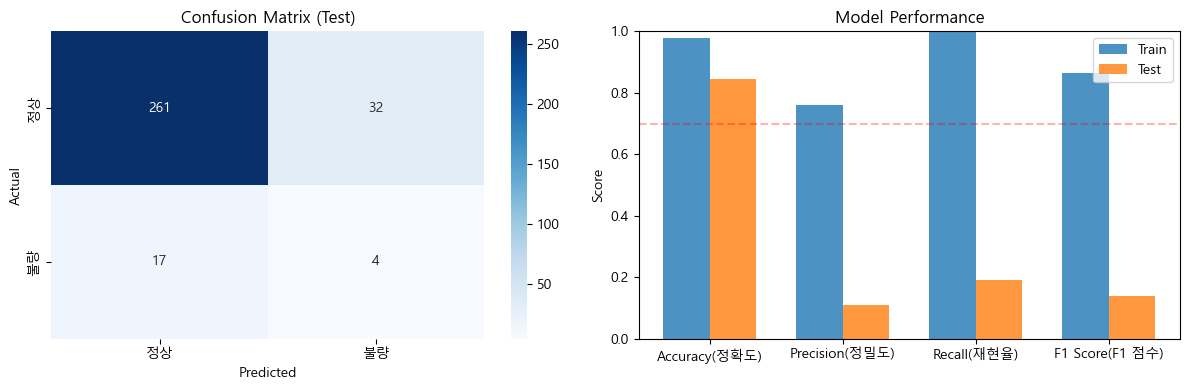

In [3]:
# 3. 모델 평가

# Train 데이터 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f'Train 데이터 평가:')
print(f"   정확도: {train_accuracy:.4f}")
print(f"   정밀도: {train_precision:.4f}")
print(f"   재현율: {train_recall:.4f}")
print(f"   F1 점수: {train_f1:.4f}")

# Test 데이터 평가
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f'\nTest 데이터 평가:')
print(f"   정확도: {test_accuracy:.4f}")
print(f"   정밀도: {test_precision:.4f}")
print(f"   재현율: {test_recall:.4f}")
print(f"   F1 점수: {test_f1:.4f}")

# Confusion Matrix(혼동 행렬)
cm = confusion_matrix(y_test, y_test_pred)
print(f'\nConfusion Matrix:\n{cm}')
print(f'TN: {cm[0,0]}') # 정상을 정상으로
print(f'FP: {cm[0,1]}') # 정상을 불량으로 - 문제
print(f'FN: {cm[1,0]}') # 불량을 정상으로 - 문제
print(f'TP: {cm[1,1]}') # 불량을 불량으로

# 시각화
plt.rc('font', family='Malgun Gothic')
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (Test)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['정상', '불량'])
axes[0].set_yticklabels(['정상', '불량'])

# 성능비교 막대 그래프
metrics = ['Accuracy(정확도)', 'Precision(정밀도)', 'Recall(재현율)', 'F1 Score(F1 점수)']
train_scores = [train_accuracy, train_precision, train_recall, train_f1]
test_scores = [test_accuracy, test_precision, test_recall, test_f1]

x = np.arange(len(metrics))
width = 0.35

axes[1].bar(x - width/2, train_scores, width, label='Train', alpha=0.8)
axes[1].bar(x + width/2, test_scores, width, label='Test', alpha=0.8)
axes[1].set_ylabel('Score')
axes[1].set_title('Model Performance')
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics)
axes[1].legend()
axes[1].set_ylim([0, 1])
axes[1].axhline(y=0.7, color='r', linestyle='--', alpha=0.3, label='Target: 0.7')

plt.tight_layout()
plt.show()

In [4]:
# 4. 모델 및 결과 저장
import joblib

# 실제 모델 저장 (실시간 예측용)
model_save_path = '../models/model_logistic.pkl'
joblib.dump(model, model_save_path)
print(f"Logistic Regression 모델 저장: {model_save_path}")

# 결과 딕셔너리 생성 (다른 프로젝트와 통일)
results_logistic = {
    'model_name': 'Logistic Regression',
    'model_type': 'machine_learning',
    'model_file': 'model_logistic.pkl',  # 모델 파일 경로
    'accuracy': test_accuracy,
    'precision': test_precision,
    'recall': test_recall,
    'f1_score': test_f1,
    'confusion_matrix': cm.tolist(),  # numpy → list 변환
    'y_true': y_test.tolist(),
    'y_pred': y_test_pred.tolist(),
    'model_params': {
        'C': model.C,
        'solver': model.solver,
        'max_iter': model.max_iter
    },
    'feature_names': X_train.columns.tolist(),
    'n_features': len(X_train.columns)
}

# 결과 저장 (PKL 형식)
results_save_path = '../models/results_logistic.pkl'
joblib.dump(results_logistic, results_save_path)
print(f"Logistic Regression 결과 저장: {results_save_path}")

print(f"\n저장된 파일들:")
print(f"  - logistic_model.pkl: 실제 모델 (예측용)")
print(f"  - results_logistic.pkl: 성능 지표 및 메타데이터")
print(f"  - scaler.pkl: 정규화 스케일러")


Logistic Regression 모델 저장: ../models/model_logistic.pkl
Logistic Regression 결과 저장: ../models/results_logistic.pkl

저장된 파일들:
  - logistic_model.pkl: 실제 모델 (예측용)
  - results_logistic.pkl: 성능 지표 및 메타데이터
  - scaler.pkl: 정규화 스케일러


# Logistic Regression 결과 요약

## 성능
- **Test Accuracy**: 84.39%
- **Test Precision**: 11.11%
- **Test Recall**: 19.05%
- **Test F1-score**: 14.29%

## 주요 발견
- 불량 21개 중 4개만 감지 (17개 놓침)
- 선형 모델의 한계 명확
- 비선형 모델 필요성 확인

## 다음 단계
- 해당모델을 베이스라인으로 설정
- 비선형 모델로 개선 시도
- 목표: Recall > 60%